Библиотеки

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Згаружаем данные

In [87]:
df=pd.read_csv('./ebw_data.csv')

Посмотрим информацию о данных

In [88]:
print('Первые 5 значений \n', df.head(5),'\n')
print('Размер датасета \n', df.shape,'\n')
print('Общая информация о наборе данных \n')
print(df.info())

Первые 5 значений 
    IW   IF   VW  FP  Depth  Width
0  47  139  4.5  80   1.60   2.54
1  47  139  4.5  80   1.62   2.50
2  47  139  4.5  80   1.68   2.60
3  47  139  4.5  80   1.58   2.52
4  45  140  4.5  80   1.76   2.48 

Размер датасета 
 (72, 6) 

Общая информация о наборе данных 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB
None


Пропусков данных нет

Основные стат. характеристики набора данных

In [89]:
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


Разделим данные на целевой столбец и признаки

In [90]:
X = df.drop(labels=['Depth','Width'], axis=1)
X=X.astype('float32')
y = df[['Depth','Width']]

In [91]:
print(X.head(), "\n")
print(y.head())

     IW     IF   VW    FP
0  47.0  139.0  4.5  80.0
1  47.0  139.0  4.5  80.0
2  47.0  139.0  4.5  80.0
3  47.0  139.0  4.5  80.0
4  45.0  140.0  4.5  80.0 

   Depth  Width
0   1.60   2.54
1   1.62   2.50
2   1.68   2.60
3   1.58   2.52
4   1.76   2.48


Проверим размерности

In [92]:
print(X.shape)
print(y.shape)

(72, 4)
(72, 2)


Разделим выборку на тренировочную и тестовую

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=346705925)

Нормализуем данные

In [94]:
columns = X.columns
norm = Normalizer()
X_train = norm.fit_transform(X_train)
print(pd.DataFrame(X_train, columns=columns).describe())
X_test = norm.fit_transform(X_test)
print(pd.DataFrame(X_test, columns=columns).describe())

              IW         IF         VW         FP
count  54.000000  54.000000  54.000000  54.000000
mean    0.270134   0.840421   0.050577   0.452532
std     0.007335   0.059574   0.012768   0.099315
min     0.255877   0.698332   0.026871   0.304686
25%     0.263579   0.831587   0.043772   0.365602
50%     0.268304   0.835985   0.054840   0.474283
75%     0.277752   0.889632   0.059309   0.478314
max     0.281129   0.914057   0.070915   0.666347
              IW         IF         VW         FP
count  18.000000  18.000000  18.000000  18.000000
mean    0.268487   0.826189   0.052371   0.475051
std     0.008371   0.070284   0.010506   0.113072
min     0.255877   0.698332   0.026917   0.304686
25%     0.262132   0.831423   0.053308   0.365750
50%     0.268304   0.835256   0.054840   0.474690
75%     0.273436   0.889266   0.055421   0.478517
max     0.281129   0.914057   0.070915   0.666347


Проверим размерности

In [95]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54, 4)
(18, 4)
(54, 2)
(18, 2)


## Обучение моделей

Функция для вычисления метрик моделей

In [96]:
def metric_model(model):
    #стремится к 0
    print("mean_absolute_error:", mean_absolute_error(y_test, model.predict(X_test)))
    #стремится к 0
    print("median_absolute_error:", median_absolute_error(y_test, model.predict(X_test)))
    #стремится к 1
    print("r2_score:", r2_score(y_test, model.predict(X_test)))

## Метод ближайших соседей с гиперпараметром K=5

In [97]:
from sklearn.neighbors import KNeighborsRegressor
KNNreg_5 = KNeighborsRegressor(n_neighbors=5)
KNNreg_5.fit(X_train, y_train)

KNeighborsRegressor()

Вычислим метрики

In [98]:
metric_model(KNNreg_5)

mean_absolute_error: 0.06738888888888887
median_absolute_error: 0.052000000000000046
r2_score: 0.8406622272233957


Подберем гиперпараметр K

In [99]:
n_range = np.array(range(1, 50, 2))
tuned_parameters = [{'n_neighbors': n_range}]
n_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_params_

{'n_neighbors': 3}

Запустим модель с наилучшим значением гиперпараметра и вычислим метрики

In [110]:
KNNreg = KNeighborsRegressor(**gs.best_params_)
KNNreg.fit(X_train, y_train)
print('Метрики для ', gs.best_params_)
metric_model(KNNreg)
print('Метрики для n_neighbors=5')
metric_model(KNNreg_5)

Метрики для  {'n_neighbors': 3}
mean_absolute_error: 0.054722222222222214
median_absolute_error: 0.04666666666666666
r2_score: 0.8729645370466351
Метрики для n_neighbors=5
mean_absolute_error: 0.06738888888888887
median_absolute_error: 0.052000000000000046
r2_score: 0.8406622272233957


Значения метрик улучшились

## Дерево решений с неограниченной глубиной 

In [111]:
dt_none = DecisionTreeRegressor(max_depth=None)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor()

Вычислим метрики

In [112]:
metric_model(dt_none)

mean_absolute_error: 0.04898148148148153
median_absolute_error: 0.04000000000000012
r2_score: 0.9032864848010264


Подберем параметр

In [113]:
param_range = np.arange(1, 51, 2)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

In [116]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_estimator_

DecisionTreeRegressor(max_depth=9)

Запустим модель с подобранным параметром глубина дерева

In [117]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
print('Метрики для ', gs.best_estimator_)
metric_model(reg)

print('Метрики для неограниченной глубины')
metric_model(KNNreg_5)

Метрики для  DecisionTreeRegressor(max_depth=9)
mean_absolute_error: 0.048981481481481494
median_absolute_error: 0.04000000000000001
r2_score: 0.9032864848010264
Метрики для неограниченной глубины
mean_absolute_error: 0.06738888888888887
median_absolute_error: 0.052000000000000046
r2_score: 0.8406622272233957


Значения метрик значительно улучшились

## Нейронная сеть

Epoch 1/30
54/54 [==============================] - 1s 5ms/step - loss: 1.3686 - accuracy: 1.0000 - val_loss: 1.1994 - val_accuracy: 1.0000
Epoch 2/30
54/54 [==============================] - 0s 2ms/step - loss: 1.2823 - accuracy: 1.0000 - val_loss: 1.1049 - val_accuracy: 1.0000
Epoch 3/30
54/54 [==============================] - 0s 3ms/step - loss: 1.1619 - accuracy: 1.0000 - val_loss: 0.9686 - val_accuracy: 1.0000
Epoch 4/30
54/54 [==============================] - 0s 3ms/step - loss: 1.0014 - accuracy: 1.0000 - val_loss: 0.8090 - val_accuracy: 1.0000
Epoch 5/30
54/54 [==============================] - 0s 2ms/step - loss: 0.8436 - accuracy: 1.0000 - val_loss: 0.6831 - val_accuracy: 1.0000
Epoch 6/30
54/54 [==============================] - 0s 3ms/step - loss: 0.7337 - accuracy: 1.0000 - val_loss: 0.6055 - val_accuracy: 1.0000
Epoch 7/30
54/54 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 1.0000 - val_loss: 0.5629 - val_accuracy: 1.0000
Epoch 8/30
54/54 [==

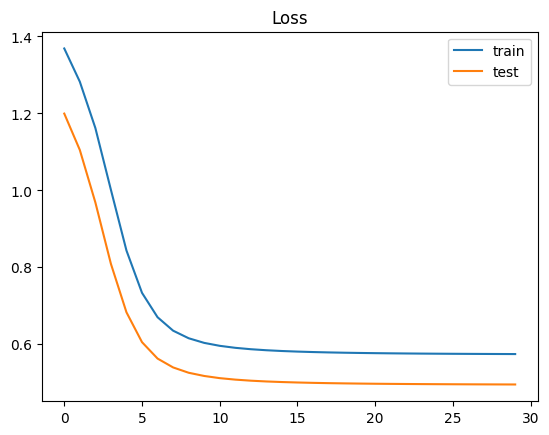

1/1 [==============================] - 0s 159ms/step - loss: 0.4956 - accuracy: 1.0000
Потери (Loss): 0.496
Точность (Accuracy): 1.000


In [118]:
model=Sequential()
#входной слой
model.add(Dense(8, activation='relu',input_shape=(X.shape[1],)))
model.add(Dense(4, activation='relu'))
#выходной слой
model.add(Dense(2, activation = 'sigmoid'))
#компилируем модель
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
#обучение
history=model.fit(X_train,y_train,epochs=30,batch_size=1,verbose=1,validation_data=(X_test,y_test))
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
accr = model.evaluate(X_test,y_test)
print('Потери (Loss): {:0.3f}\nТочность (Accuracy): {:0.3f}'.format(accr[0],accr[1]))

Сравнение алгоритмов

In [120]:
print('Результаты предсказаний нейронной сети')
metric_model(model)

print('\nРезультаты предсказаний решающих деревьев')
metric_model(reg)

print('\nРезультаты предсказаний регрессии')
metric_model(KNNreg)

Результаты предсказаний нейронной сети
1/1 [==============================] - 0s 26ms/step
mean_absolute_error: 0.5706115265687308
1/1 [==============================] - 0s 23ms/step
median_absolute_error: 0.5255352050065994
1/1 [==============================] - 0s 25ms/step
r2_score: -8.952770505957568

Результаты предсказаний решающих деревьев
mean_absolute_error: 0.048981481481481494
median_absolute_error: 0.04000000000000001
r2_score: 0.9032864848010264

Результаты предсказаний регрессии
mean_absolute_error: 0.054722222222222214
median_absolute_error: 0.04666666666666666
r2_score: 0.8729645370466351


Результаты алгоритма решающих деревьев лучше, чем все остальные рассмотренные алгоритмы

## Попробуем предсказать размер шва

In [121]:
pred = pd.DataFrame(data=[X_test[1]], columns=columns)
print(pred)
print('Размер сварного шва ', y_test.values[1])

       IW        IF        VW        FP
0  0.2685  0.835334  0.047733  0.477333
Размер сварного шва  [1.16 1.96]


In [122]:
#нейронная сеть
print('Результаты предсказаний нейронной сети ', model.predict(pred))
#деревья
print('Результаты предсказаний решающих деревьев ', reg.predict(pred))
#регрессия
print('Результаты предсказаний регрессии ', KNNreg.predict(pred))

1/1 [==============================] - 0s 24ms/step
Результаты предсказаний нейронной сети  [[0.9979405 0.9989372]]
Результаты предсказаний решающих деревьев  [[1.2  1.98]]
Результаты предсказаний регрессии  [[1.14666667 1.95333333]]


c:\Users\Antonida.Butuzova\my_proj\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Antonida.Butuzova\my_proj\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


Для прогнозирования размера сварного шва будем использовать метод решающих деревьев.

Сохраним обученную модель

In [123]:
import pickle

with open('reg_pkl.pkl', 'wb') as f:
    pickle.dump(reg, f)